In [1]:
import numpy as np 
import polars as pl
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Loading dataset
mov_data=pd.read_csv('dataset_s/movies.dat',sep='::',engine='python',encoding='latin',names=['MovieIDs','MovieName','Category'])
rate_data=pd.read_csv('dataset_s/ratings.dat',sep='::',engine='python',encoding='latin',names=['ID','MovieID','Ratings','TimeStamp'])
user_data=pd.read_csv('dataset_s/users.dat',sep='::',engine='python',encoding='latin',names=['UserID','Gender','Age','Ocupation','Zip-code'])

In [3]:
print(mov_data.head(),mov_data.shape,'\n',sep='\n')
print(rate_data.head(),rate_data.shape,'\n',sep='\n')
print(user_data.head(),user_data.shape,'\n',sep='\n')

print("-----Null values in Movie data----- ",mov_data.isnull().sum(),sep="\n",)
print("\n-----Null values in Rating data----- ",rate_data.isnull().sum(),sep="\n",)
print("\n-----Null values in User data----- ",user_data.isnull().sum(),sep="\n",)

   MovieIDs                           MovieName                      Category
0         1                    Toy Story (1995)   Animation|Children's|Comedy
1         2                      Jumanji (1995)  Adventure|Children's|Fantasy
2         3             Grumpier Old Men (1995)                Comedy|Romance
3         4            Waiting to Exhale (1995)                  Comedy|Drama
4         5  Father of the Bride Part II (1995)                        Comedy
(3883, 3)


   ID  MovieID  Ratings  TimeStamp
0   1     1193        5  978300760
1   1      661        3  978302109
2   1      914        3  978301968
3   1     3408        4  978300275
4   1     2355        5  978824291
(1000209, 4)


   UserID Gender  Age  Ocupation Zip-code
0       1      F    1         10    48067
1       2      M   56         16    70072
2       3      M   25         15    55117
3       4      M   45          7    02460
4       5      M   25         20    55455
(6040, 5)


-----Null values in Movie data-

In [4]:
conc_dat=pd.concat([mov_data,rate_data,user_data],axis=1)
X=conc_dat.copy()
X=X.dropna(axis="index")
X=X.sample(len(X))
print(X.dtypes,'\n',X.shape)

MovieIDs     float64
MovieName     object
Category      object
ID             int64
MovieID        int64
Ratings        int64
TimeStamp      int64
UserID       float64
Gender        object
Age          float64
Ocupation    float64
Zip-code      object
dtype: object 
 (3883, 12)


In [5]:
X

,MovieIDs,MovieName,Category,ID,MovieID,Ratings,TimeStamp,UserID,Gender,Age,Ocupation,Zip-code
160,162.0,Crumb (1994),Documentary,2,3418,4,978299809,161.0,M,45.0,16.0,98107-2117
27,28.0,Persuasion (1995),Romance,1,1721,4,978300055,28.0,F,25.0,1.0,14607
930,942.0,Laura (1944),Crime|Film-Noir|Mystery,10,2093,4,978229624,931.0,F,56.0,1.0,06032
1211,1230.0,Annie Hall (1977),Comedy|Romance,11,1265,3,978219815,1212.0,F,50.0,1.0,60089
1238,1258.0,"Shining, The (1980)",Horror,11,3101,1,978902406,1239.0,F,25.0,20.0,50111
...,...,...,...,...,...,...,...,...,...,...,...,...
3255,3324.0,Drowning Mona (2000),Comedy,24,539,3,978133273,3256.0,M,25.0,15.0,92111
3084,3153.0,"7th Voyage of Sinbad, The (1958)",Action|Adventure|Fantasy,23,2454,4,978464367,3085.0,M,25.0,4.0,78703
911,923.0,Citizen Kane (1941),Drama,10,3466,5,979168267,912.0,F,35.0,2.0,91324
1522,1562.0,Batman & Robin (1997),Action|Adventure|Crime,15,2712,3,978196521,1523.0,M,25.0,17.0,95209


In [6]:
##finding correlations
s=(X.dtypes==object)
S=s[s].index
X_corr=X.copy().drop(columns=S)
cor=X_corr.corr()
cor["Ratings"]

MovieIDs    -0.153298
ID          -0.150804
MovieID     -0.071695
Ratings      1.000000
TimeStamp   -0.008635
UserID      -0.153561
Age         -0.017635
Ocupation   -0.001090
Name: Ratings, dtype: float64

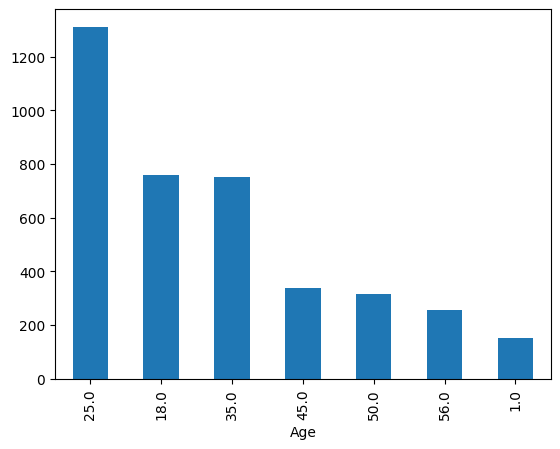

In [7]:
X["Age"].value_counts().plot(kind="bar")
plt.show()

Text(0.5, 0, 'Age')

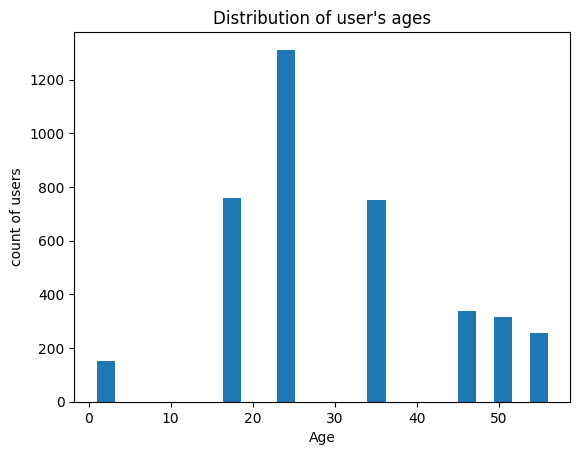

In [8]:
X.Age.plot.hist(bins=25)
plt.title("Distribution of user's ages")
plt.ylabel('count of users')
plt.xlabel('Age')

In [9]:
labels = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79']
X['age_group'] = pd.cut(X.Age, range(0, 81, 10), right=False, labels=labels)
X[['Age', 'age_group']].drop_duplicates()[:10]
X=X.drop(columns="Age")

In [10]:
X.dtypes

MovieIDs      float64
MovieName      object
Category       object
ID              int64
MovieID         int64
Ratings         int64
TimeStamp       int64
UserID        float64
Gender         object
Ocupation     float64
Zip-code       object
age_group    category
dtype: object

In [11]:
#removing least relevent columns 
col_to_be_remove=["MovieIDs","MovieName","MovieID","TimeStamp","UserID","Zip-code"]
X=X.drop(columns=col_to_be_remove)

In [12]:
# Manging Categorical columns
from sklearn.preprocessing import OneHotEncoder
object_cols=(X.dtypes==object)
object_cols=list(object_cols[object_cols].index)
object_cols.append("age_group")
OH_encoder=OneHotEncoder(handle_unknown='ignore',sparse=False)
OH_cols = pd.DataFrame(OH_encoder.fit_transform(X[object_cols]))
OH_cols.index = X.index
num_X = X.drop(object_cols, axis=1)
OH_X = pd.concat([num_X, OH_cols], axis=1)
OH_X.columns = OH_X.columns.astype(str)


/home/fansan/.local/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [13]:
y=pd.Series(X["Ratings"])
X=X.drop(columns="Ratings")

In [14]:
OH_X

,ID,Ratings,Ocupation,0,1,2,3,4,5,6,...,299,300,301,302,303,304,305,306,307,308
160,2,4,16.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
27,1,4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
930,10,4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1211,11,3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1238,11,1,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3255,24,3,15.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3084,23,4,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
911,10,5,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1522,15,3,17.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [15]:
# Spliting data
from sklearn.model_selection import train_test_split
X_train,X_valid,y_train,y_valid=train_test_split(OH_X,y,train_size=0.8,test_size=0.2)

In [16]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
Y_pred = logreg.predict(X_valid)
acc_log = round(logreg.score(X_valid, y_valid) * 100, 2)
acc_log

/home/fansan/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


92.41

In [17]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(Y_pred,y_valid)

0.07979407979407979

In [32]:
import joblib
joblib.dump(logreg,"movie_rating_prediction_model")

['movie_rating_prediction_model']